# Topic

* Kaggle: Predict Future Sales

    [kaggle 링크 바로가기](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview)

# Ready

## Load data

## import

In [1]:
import pandas as pd
import numpy as np

import os

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

print('Import Done!')

Import Done!


## default values

In [2]:
# 불러온 data 경로
path_data = './data'

# Data Information

In [3]:
df_item_cat = pd.read_csv(os.path.join(path_data, 'item_categories.csv'))
df_item = pd.read_csv(os.path.join(path_data, 'items.csv'))
df_sales = pd.read_csv(os.path.join(path_data, 'sales_train.csv'))
df_shops = pd.read_csv(os.path.join(path_data, 'shops.csv'))
df_test = pd.read_csv(os.path.join(path_data, 'test.csv'))
df_sample = pd.read_csv(os.path.join(path_data, 'sample_submission.csv'))

FileNotFoundError: [Errno 2] No such file or directory: '/content/data\\item_categories.csv'

## item_categories.csv


* shape : 84 x 2
* columns
    1. `item_category_name` : item을 분류하는 category의 이름
    2. `item_category_id` : category의 id값

In [ ]:
df_item_cat

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


## items.csv

* shape : 22170 x 3
* columns
    1. `item_name` : item의 이름
    2. `item_id` : item의 id값
    3. `item_category_id` : item이 속한 category의 id값

In [ ]:
df_item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


## sales_train.csv

* shape : 2935849 x 6
* columns
    1. `date` : 거래일 (dd/mm/yyyy) (2013년 1월 ~ 2015년 10월)
    2. `date_block_num` : 2013년 1월부터 매달 순서대로 인덱스를 붙임
        * 2013년 1월 -> 0
        * 2013년 5월 -> 4
        * 2015년 10월 -> 33
    3. `shop_id` : 거래가 이루어진 shop의 id값
    4. `item_id` : 거래 item의 id값
    5. `item_price` : 거래 item의 가격
    6. `item_cnt_day` : 거래 item이 팔린 개수

In [ ]:
df_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


## shops.csv

* shape : 60 x 2
* columns
    1. `shop_name` : shop 이름
    2. `shop_id` : shop의 id값

In [ ]:
df_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


## test.csv

* shape : 214200 x 3
* columns
    1. `ID` : (shop, item) 튜플의 고유 인덱스
    2. `shop_id` : shop의 id값
    3. `item_id` : item의 id값

* 설명
    * 본래 shop의 개수는 60개, item의 개수는 22170개
    * 확인해보니 shop 60개 중 42개만 각각 item을 5100개씩 판매함. (214200 = 5100 * 42)

In [ ]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
print(len(df_test) / 5100)
print()
df_test.groupby('shop_id').size()

42.0



shop_id
2     5100
3     5100
4     5100
5     5100
6     5100
7     5100
10    5100
12    5100
14    5100
15    5100
16    5100
18    5100
19    5100
21    5100
22    5100
24    5100
25    5100
26    5100
28    5100
31    5100
34    5100
35    5100
36    5100
37    5100
38    5100
39    5100
41    5100
42    5100
44    5100
45    5100
46    5100
47    5100
48    5100
49    5100
50    5100
52    5100
53    5100
55    5100
56    5100
57    5100
58    5100
59    5100
dtype: int64

## sample_submission.csv

* shape : 214200 x 2 (test.csv와 동일)
* columns
    1. `ID` : (shop, item) 튜플의 고유 인덱스
    2. `item_cnt_month` : 2015년 11월 한달동안 거래될 item의 개수 (예측값)

In [ ]:
df_sample

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## 월별, ID별 판매량 확인

In [ ]:
df = df_sales.copy()

# ID column 추가
df['date'] = df['date'].apply(lambda x: x[-4:]+x[3:5]+x[:2])
df['date'] = pd.to_datetime(df['date'])
df = pd.merge(df, df_test, how='left', on=['shop_id', 'item_id'])
df.dropna(axis=0, inplace=True)
df['ID'] = df['ID'].astype('int')

# item_category_id
df = pd.merge(df, df_item[['item_id', 'item_category_id']], how='left', on=['item_id'])
df['item_cnt_day'] = df['item_cnt_day'].astype('int')

df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_category_id
0,2013-01-02,0,59,22154,999.0,1,150983,37
1,2013-01-03,0,25,2574,399.0,2,56520,55
2,2013-01-05,0,25,2574,399.0,1,56520,55
3,2013-01-07,0,25,2574,399.0,1,56520,55
4,2013-01-08,0,25,2574,399.0,2,56520,55
...,...,...,...,...,...,...,...,...
1224434,2015-10-10,33,25,7409,299.0,1,58431,55
1224435,2015-10-09,33,25,7460,299.0,1,59331,55
1224436,2015-10-14,33,25,7459,349.0,1,58430,55
1224437,2015-10-22,33,25,7440,299.0,1,60342,57


In [ ]:
df[df.item_category_id == 3]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_category_id
212328,2013-11-29,10,28,5671,2590.0,14,40837,3
212329,2013-11-30,10,28,5671,2590.0,3,40837,3
212330,2013-11-29,10,28,5672,2590.0,4,40833,3
213526,2013-11-29,10,26,5671,2590.0,3,51037,3
213527,2013-11-29,10,26,5672,2590.0,3,51033,3
...,...,...,...,...,...,...,...,...
1224408,2015-10-24,33,25,7231,999.0,1,58978,3
1224417,2015-10-04,33,25,7233,599.0,1,57313,3
1224419,2015-10-21,33,25,7233,479.0,1,57313,3
1224420,2015-10-03,33,25,7233,599.0,1,57313,3


In [ ]:
'''
생각해볼 요소

가격에 따른 판매량 증가가 있는가?
'''
df.groupby(['date_block_num', 'ID']).sum()

shop_id  item_id  item_price  item_cnt_day  \
date_block_num ID                                                   
0              5122          4     5823      2500.0             1   
               5127          8    11286      4660.5             3   
               5142          8    11642      1198.0             2   
               5143         24    34932      5994.0             9   
               5152          4     5459       299.0             1   
...                        ...      ...         ...           ...   
33             213962       45    16106       799.0             1   
               214068       45     6184       498.0             1   
               214069       45     3985        98.0             1   
               214187       45     5401       799.0             1   
               214195       45    18454        99.0             1   

                       item_category_id  
date_block_num ID                        
0              5122                  35  
               5127                   4  
               5142                  70  
               5143                 210  
               5152                  55  
...                                 ...  
33             213962                64  
               214068                30  
               214069                55  
               214187                19  
               214195                55  

[600159 rows x 5 columns]

In [ ]:
df.groupby(['date_block_num', 'ID']).count()

date  shop_id  item_id  item_price  item_cnt_day  \
date_block_num ID                                                         
0              5122       1        1        1           1             1   
               5127       2        2        2           2             2   
               5142       2        2        2           2             2   
               5143       6        6        6           6             6   
               5152       1        1        1           1             1   
...                     ...      ...      ...         ...           ...   
33             213962     1        1        1           1             1   
               214068     1        1        1           1             1   
               214069     1        1        1           1             1   
               214187     1        1        1           1             1   
               214195     1        1        1           1             1   

                       item_category_id  
date_block_num ID                        
0              5122                   1  
               5127                   2  
               5142                   2  
               5143                   6  
               5152                   1  
...                                 ...  
33             213962                 1  
               214068                 1  
               214069                 1  
               214187                 1  
               214195                 1  

[600159 rows x 6 columns]

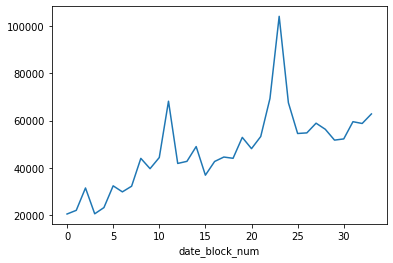

In [ ]:
df.groupby('date_block_num')['item_cnt_day'].sum().plot()

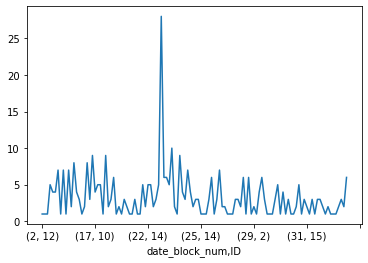

In [ ]:
df[df.ID <= 15].groupby(['date_block_num', 'ID'])['item_cnt_day'].sum().plot()

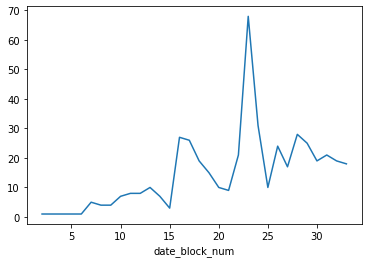

In [ ]:
df[df.ID <= 20].groupby(['date_block_num'])['item_cnt_day'].sum().plot()

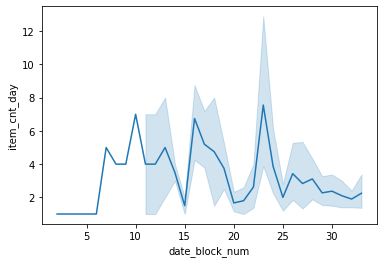

In [ ]:
sns.lineplot(data=df[df.ID <= 20].groupby(['date_block_num', 'ID']).sum(), x='date_block_num', y='item_cnt_day', )

## MTD, YTD 확인해보기

In [ ]:
# 코드

# Preprocessing

# Modeling

# Result